In [4]:
# !pip install river --user

  Using cached https://files.pythonhosted.org/packages/e1/8b/d05bd3bcd0057954f08f61472db95f4ac71c3f0bf5432abe651694025396/scipy-1.6.3-cp37-cp37m-win_amd64.whl


In [31]:
from pprint import pprint
# The pprint module provides a capability to “pretty-print” 
# arbitrary Python data structures in a form which can be used as input to the interpreter.
from river import datasets
from river import compose
from river import linear_model
from river import metrics
from river import preprocessing

## Example 1

In [32]:
dataset = datasets.Phishing()

In [33]:
for x, y in dataset:
    pprint(x)
    print(y)
    break

{'age_of_domain': 1,
 'anchor_from_other_domain': 0.0,
 'empty_server_form_handler': 0.0,
 'https': 0.0,
 'ip_in_url': 1,
 'is_popular': 0.5,
 'long_url': 1.0,
 'popup_window': 0.0,
 'request_from_other_domain': 0.0}
True


In [34]:
model = compose.Pipeline(preprocessing.StandardScaler(), linear_model.LogisticRegression())

In [35]:
metric = metrics.Accuracy()

In [36]:
for x, y in dataset:
    y_pred = model.predict_one(x)      # make a prediction
    metric = metric.update(y, y_pred)  # update the metric
    model = model.learn_one(x, y)      # make the model lea

In [37]:
metric

Accuracy: 89.20%

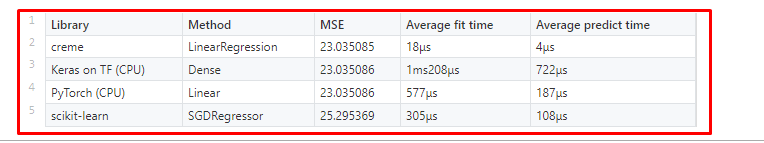

## Example 2

In [38]:
from river import feature_extraction
from river import naive_bayes

In [39]:
docs = [   ('Chinese Beijing Chinese', 'yes'),
 ('Chinese Chinese Shanghai', 'yes'),
('Chinese Macao', 'yes'),
('Tokyo Japan Chinese', 'no')
]

In [40]:
model = compose.Pipeline(
    ('tokenize', feature_extraction.BagOfWords(lowercase=False)),
    ('nb', naive_bayes.MultinomialNB(alpha=1)))

In [41]:
for sentence, label in docs:
     print(sentence+" -> "+label)

Chinese Beijing Chinese -> yes
Chinese Chinese Shanghai -> yes
Chinese Macao -> yes
Tokyo Japan Chinese -> no


In [43]:
%%time
for sentence, label in docs:
     model = model.learn_one(sentence, label)

Wall time: 2 ms


In [44]:
new_unseen_text = 'Tokyo india'

In [45]:
model.predict_one(new_unseen_text)

'no'

### Training on a new data and new category

In [46]:
model.learn_one('India USA','may be')

Pipeline (
  BagOfWords (
    on=None
    strip_accents=True
    lowercase=False
    preprocessor=None
    tokenizer=<built-in method findall of re.Pattern object at 0x0000021C2FE8B100>
    ngram_range=(1, 1)
  ),
  MultinomialNB (
    alpha=1
  )
)

In [47]:
model.predict_one("India Germany")

'may be'

## Example 3

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [81]:
filename = 'stock_data.csv'

### Gathered Stock news from Multiple twitter Handles regarding Economic news dividing into two parts : Negative(-1) and positive(1) . 
#### Negative count: 2,106
#### Positive count: 3,685

In [82]:
df = pd.read_csv(filename)

In [83]:
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [84]:
df.columns

Index(['Text', 'Sentiment'], dtype='object')

In [85]:
df.shape

(5791, 2)

In [86]:
df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [144]:
df.dtypes

Text         object
Sentiment     int64
dtype: object

In [88]:
X = df.iloc[:, 0]
y = df.iloc[:, 1]

In [89]:
X.head()

0    Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1    user: AAP MOVIE. 55% return for the FEA/GEED i...
2    user I'd be afraid to short AMZN - they are lo...
3                                    MNTA Over 12.00  
4                                     OI  Over 21.37  
Name: Text, dtype: object

In [123]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Sentiment, dtype: int64

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42 )

In [125]:
X_train = X_train.to_list()
y_train = y_train.to_list()

In [126]:
print(len(X_train))
print(len(y_train))

4922
4922


In [127]:
train_data = [(X_train[i], y_train[i]) for i in range(len(X_train))]

In [140]:
train_data[5:15]

[('with FCX gapping well above ideal entry looking for a pull in to at least 35 on open for an entry',
  1),
 ('c two daily  bull flags on top of each other=bullish still  ', 1),
 ('New ong entry - IBM Big Blue Flashes Green -  ', 1),
 ('RT @newley: Indian startup Oyo Hotels &amp; Homes is planning to move some employees off its payroll and onto the rolls of its biggest investorâ€¦',
  -1),
 ("user: BAC what's the play short term ?>> Will depend on economic data + StressTest -  ong term?>> 13-14.00",
  1),
 ('user in a bullish you sell always, no buy; in a bearish market you buy no sell NX',
  -1),
 ('SHOT CNE  13.7', -1),
 ('here is NEW up target for AAP and notice shakeout reading at -8.49 ! and we had buy dot Monday  ',
  1),
 ('TIVO BY!  Price action? Check - breaking out above 12.95. Volume?  Check, 2x avg.',
  1),
 ('OVI on watch list has volume of 10% of ave full day - over line a little  ',
  1)]

In [129]:
model = compose.Pipeline(
    ('tokenize', feature_extraction.BagOfWords(lowercase=False)),
    ('nb', naive_bayes.MultinomialNB(alpha=1)))

In [130]:
metric = metrics.Accuracy()

In [131]:
for text, sentiment in train_data:
    model = model.learn_one(text, sentiment)
    sentiment_predict = model.predict_one(text)
    metric = metric.update(sentiment, sentiment_predict)

In [132]:
metric

Accuracy: 93.09%

In [133]:
# for testing model
X_test = X_test.to_list()
y_test = y_test.to_list()

In [135]:
test_data = [(X_test[i], y_test[i]) for i in range(len(X_test))]

In [136]:
for text, sentiment in test_data:
    sentiment_predict = model.predict_one(text)
    metric = metric.update(sentiment, sentiment_predict)

In [137]:
metric

Accuracy: 90.76%

In [138]:
model.predict_one('user FIE has had a great run since BO. Suggestions for trailing stop? Targets?')

1

In [141]:
model.predict_one('user in a bullish you sell always, no buy; in a bearish market you buy no sell NX')

1

In [142]:
model.predict_one('very much rude news splitting in the country')

1

In [143]:
model.predict_one('RT @newley: Indian startup Oyo Hotels &amp; Homes is planning to move some employees off its payroll and onto the rolls of its biggest investorâ€¦')

-1